# Functional status (mRS) prediction

## 3. Exploratory data analysis

In [10]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [11]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [13]:
X = pd.read_pickle('splits/fav_functional_status/X_train_fav_functional_status.pkl')
y = pd.DataFrame(pd.read_pickle('splits/fav_functional_status/y_train_fav_functional_status.pkl'))
Xy = pd.concat([X, y['fav_mrs']], axis = 1)

In [14]:
X.head()

glucose  a1c  calcium  mag  phos   inr    plt  plt_lymph  sbp  map hypox  \
322    219.0  7.7      8.4  NaN   NaN  1.04  205.0        6.0  125   90     Y   
381    141.0  5.7      7.9  1.9   2.9  1.43  109.0       36.3  149   75     N   
330    132.0  5.4      NaN  NaN   NaN   NaN    NaN        NaN  134   95     N   
84      91.0  5.1      8.5  NaN   NaN  1.79  290.0       15.3  150  108     N   
289    111.0  5.9      NaN  NaN   NaN   NaN    NaN        NaN  152  110     N   

    wake_up seizure transfer  nih_admit tpa stroke_etiol  age sex   race  \
322       N       N        N        7.0   Y          1.0   58   M  black   
381       Y       N        Y       21.0   N          2.0   72   F  white   
330       Y       N        Y       18.0   Y          1.0   39   F  white   
84        N       N        N       18.0   N          2.0   90   F  white   
289       N       N        Y       11.0   Y          1.0   60   M  white   

    pre_mrs htn dm ckd hld afib smoking prior_stroke   bmi ac_ap left  \
322     0.0   Y  Y   N   Y    N       N            Y  38.0     Y    Y   
381     0.0   Y  N   N   Y    Y       Y            Y  27.0     Y    Y   
330     0.0   N  N   N   N    N       N            N  41.0     Y    Y   
84      3.0   Y  N   N   Y    Y     NaN            Y  29.0     Y    N   
289     NaN   Y  N   N   Y    N     NaN            N  33.0     Y    Y   

    occ_site tandem  cbf_30  tmax_6  tmax_10  mismatch_vol  hypoperf_index  \
322      ICA      N     NaN     NaN      NaN           NaN             NaN   
381       M1      N     0.0    81.0      8.0          81.0             0.1   
330       M1      Y     0.0    42.0     15.0          42.0             0.4   
84        M1      N     NaN     NaN      NaN           NaN             NaN   
289       M1      Y     NaN     NaN      NaN           NaN             NaN   

     cbv_index  aspects hyperdense coll_score approach  heparin ptas  \
322        NaN     10.0        0.0        3.0  Femoral      0.0    N   
381        0.8     10.0        1.0        2.0  Femoral   3000.0    N   
330        0.9      7.0        0.0        3.0  Femoral      0.0    N   
84         NaN     10.0        0.0        2.0  Femoral      0.0    N   
289        NaN      8.0        1.0        1.0  Femoral   2000.0    Y   

    stent_ret  stent_ret_length aspiration bgc first_pass_reperf  num_pass  \
322         N               NaN          N   N                 N       NaN   
381         N               NaN          Y   N                 Y       1.0   
330         Y              20.0          N   N                 Y       1.0   
84          N               NaN          N   N                 N       NaN   
289         Y              20.0          N   N                 N       3.0   

    rescue_ia procedure_ap gen_anes gen_anes_vol  fluoro_time tici hypoten_mt  \
322         N            N        N            N         37.6    1          N   
381         N            N        Y            N          5.1   2B          N   
330         N            N        N            N         23.6    3          N   
84          N            N        N            N         40.2    0          N   
289         N            N        N            N         26.1    3          N   

     time_to_arr  time_to_puncture  time_to_first_pass  time_to_reperf trevo  \
322     4.066667          2.250000                 NaN             NaN     N   
381     7.033333          1.850000            0.216667        9.150000     N   
330     5.100000          1.416667            0.200000        7.216667     Y   
84      0.866667          0.916667                 NaN             NaN     N   
289     3.883333          0.816667            0.900000        5.883333     N   

    solitaire embotrap capture  
322         N        N       N  
381         N        N       N  
330         N        N       N  
84          N        N       N  
289         Y        N       N

### Univariate analysis of features

/var/folders/r2/d81lfs516v1305p_ns8bh_zh0000gn/T/ipykernel_75149/800512093.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


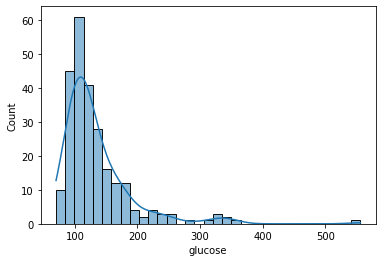

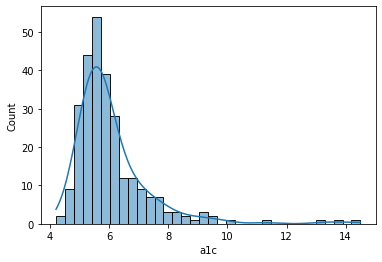

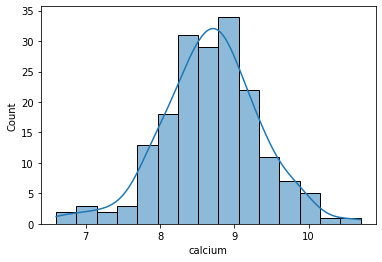

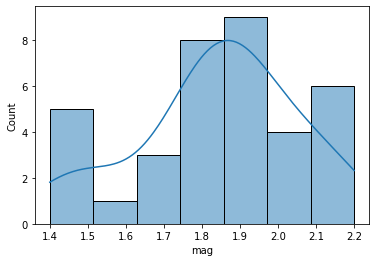

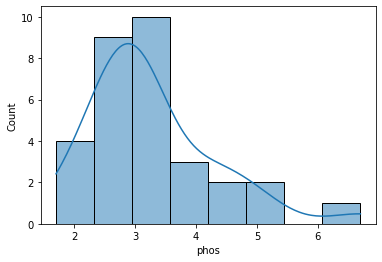

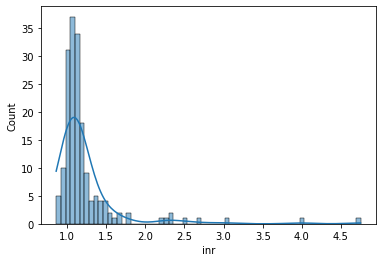

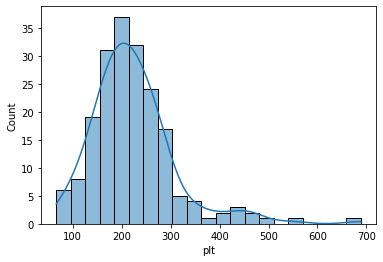

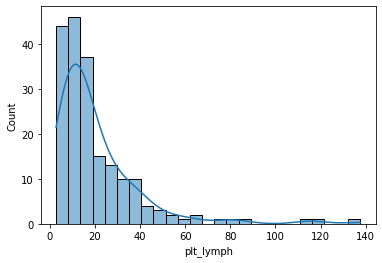

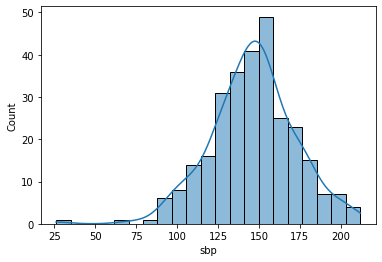

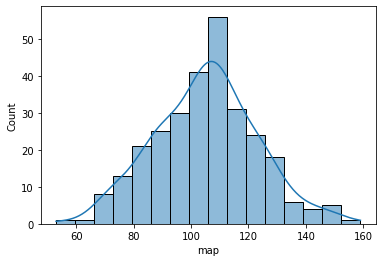

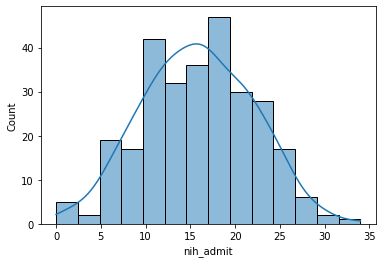

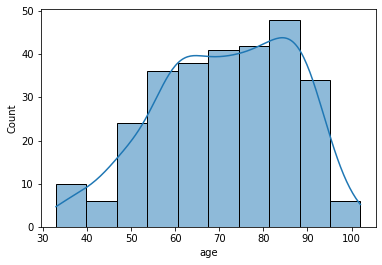

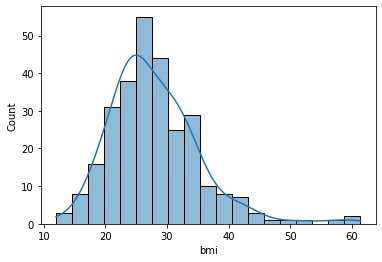

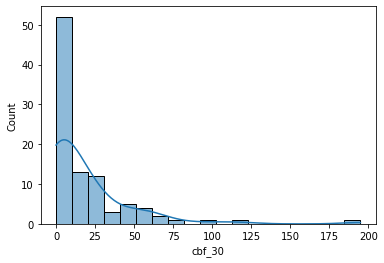

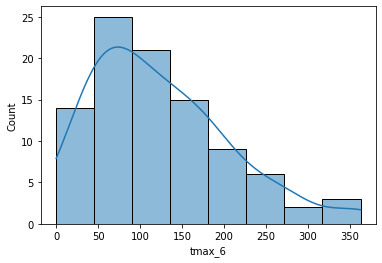

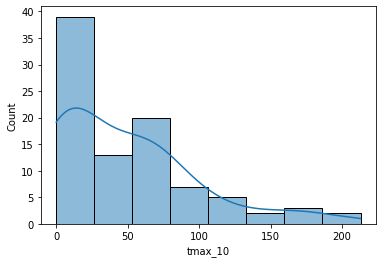

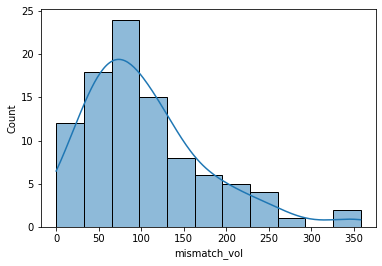

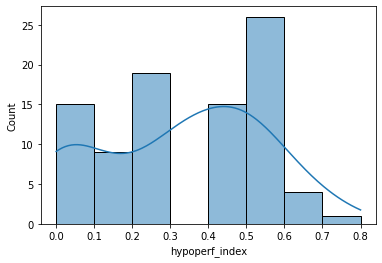

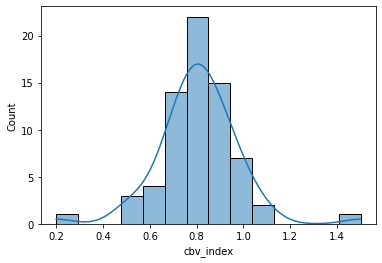

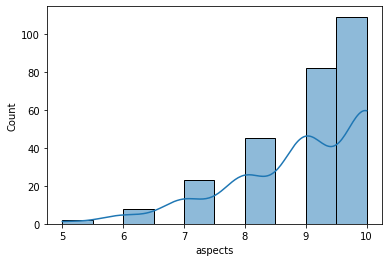

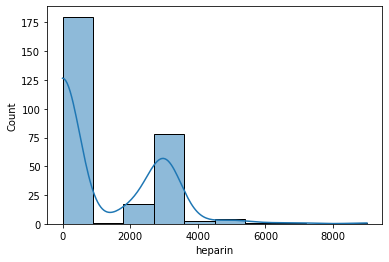

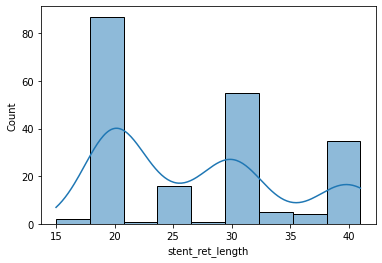

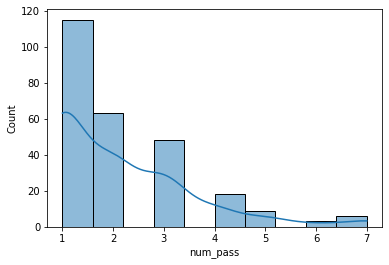

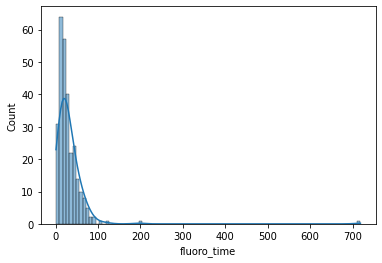

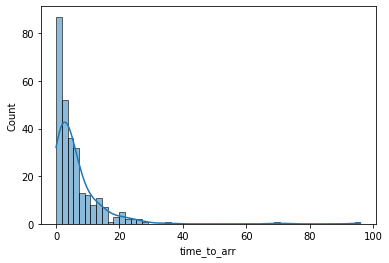

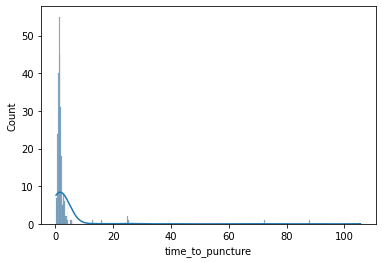

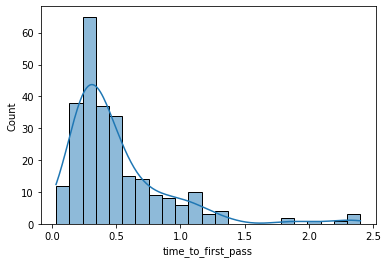

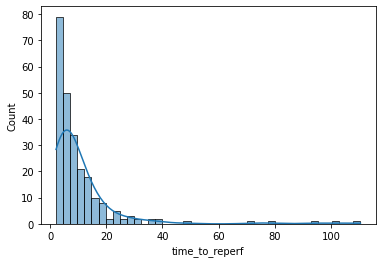

In [15]:
for col in X.select_dtypes(include = ['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data = X, x = col, kde = True)

/var/folders/r2/d81lfs516v1305p_ns8bh_zh0000gn/T/ipykernel_75149/1500536740.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


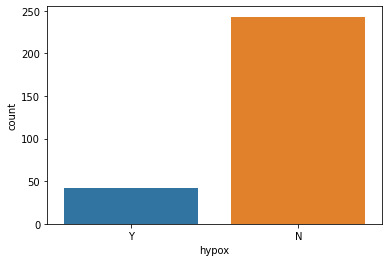

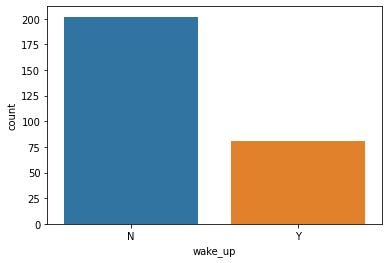

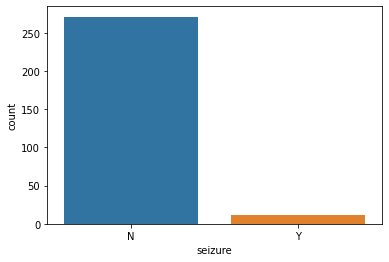

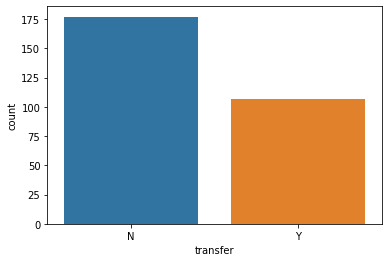

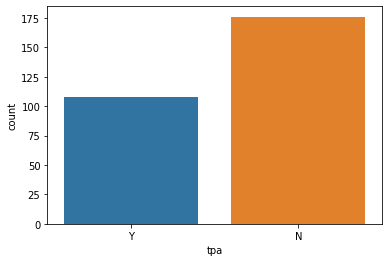

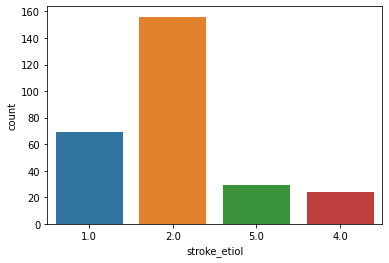

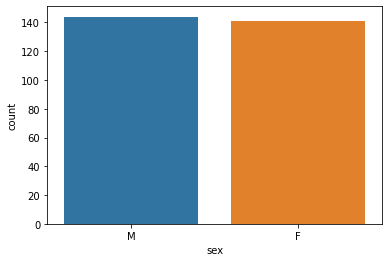

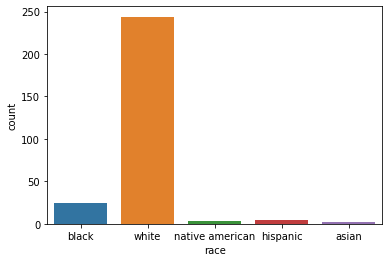

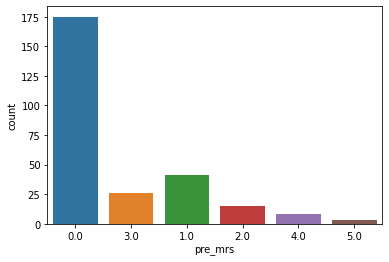

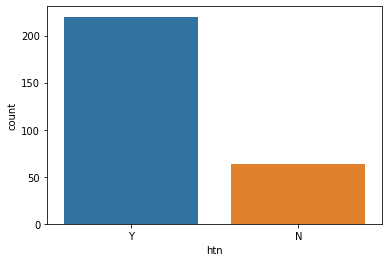

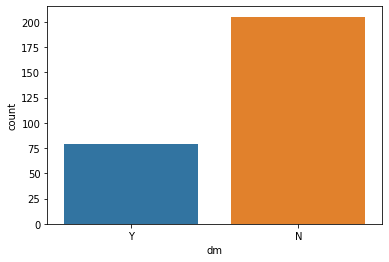

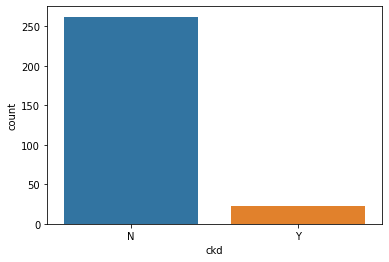

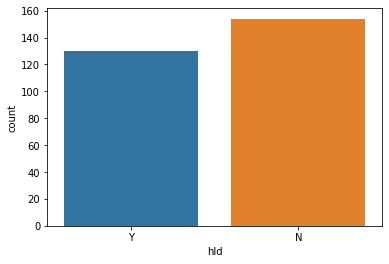

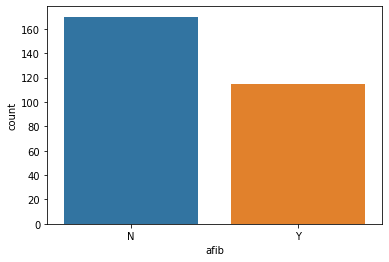

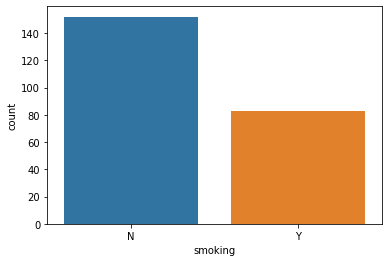

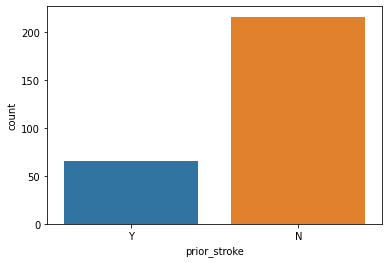

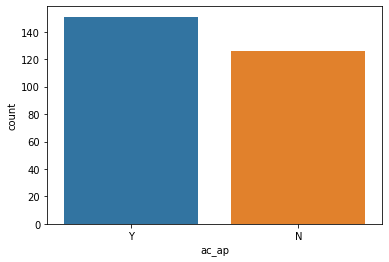

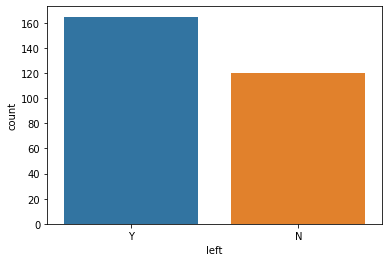

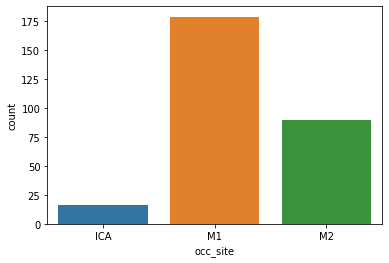

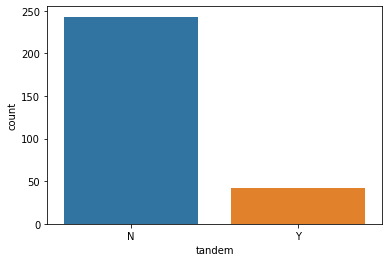

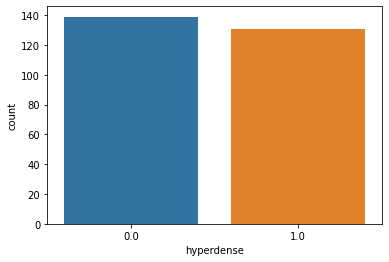

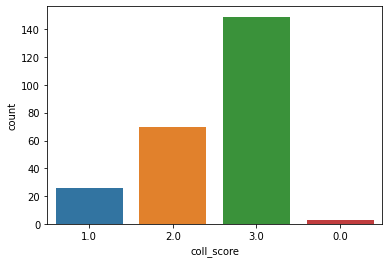

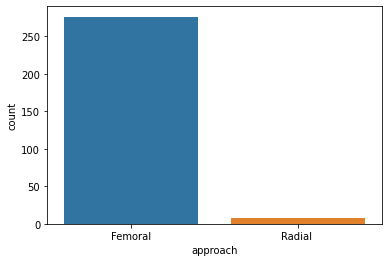

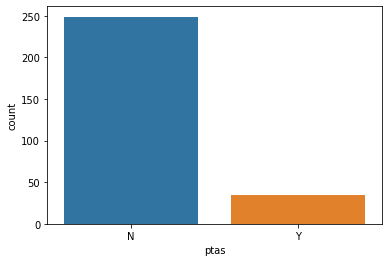

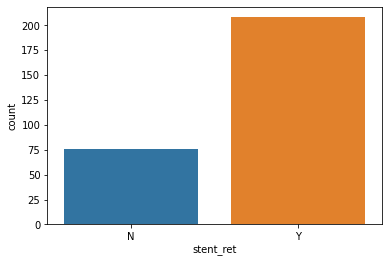

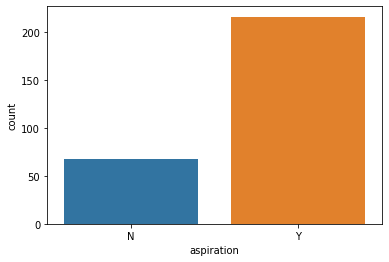

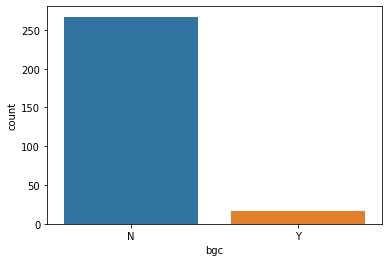

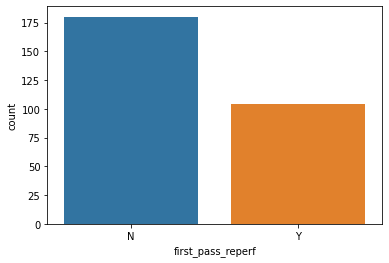

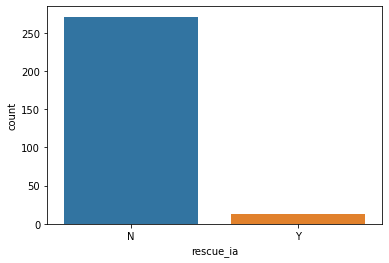

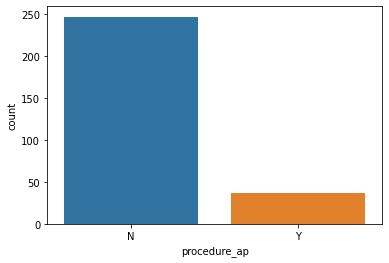

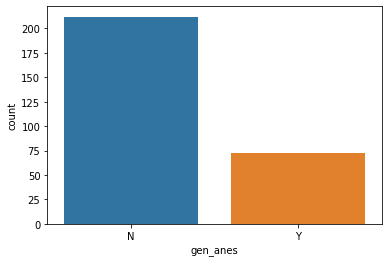

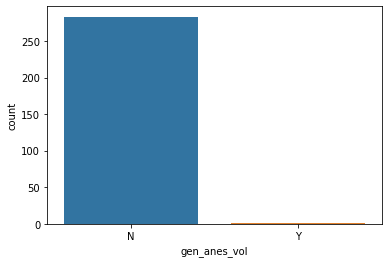

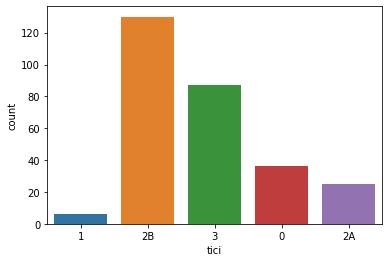

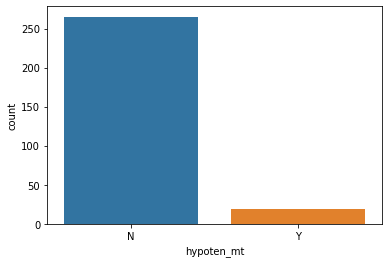

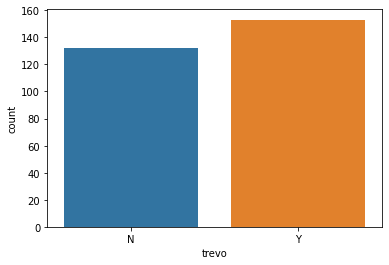

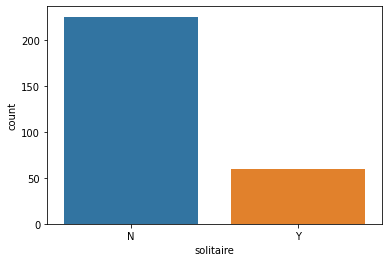

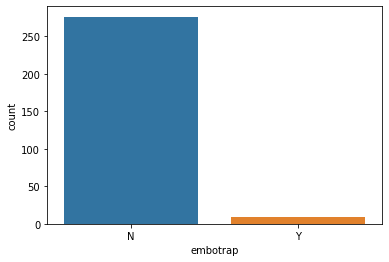

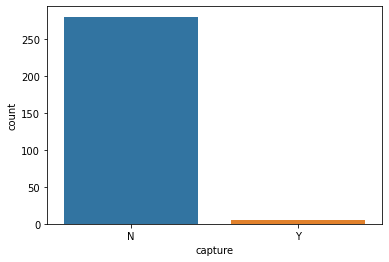

In [16]:
for col in X.select_dtypes(include = ['object']).columns:
    plt.figure()
    sns.countplot(data = X, x = col)

### Bivariate analysis of features

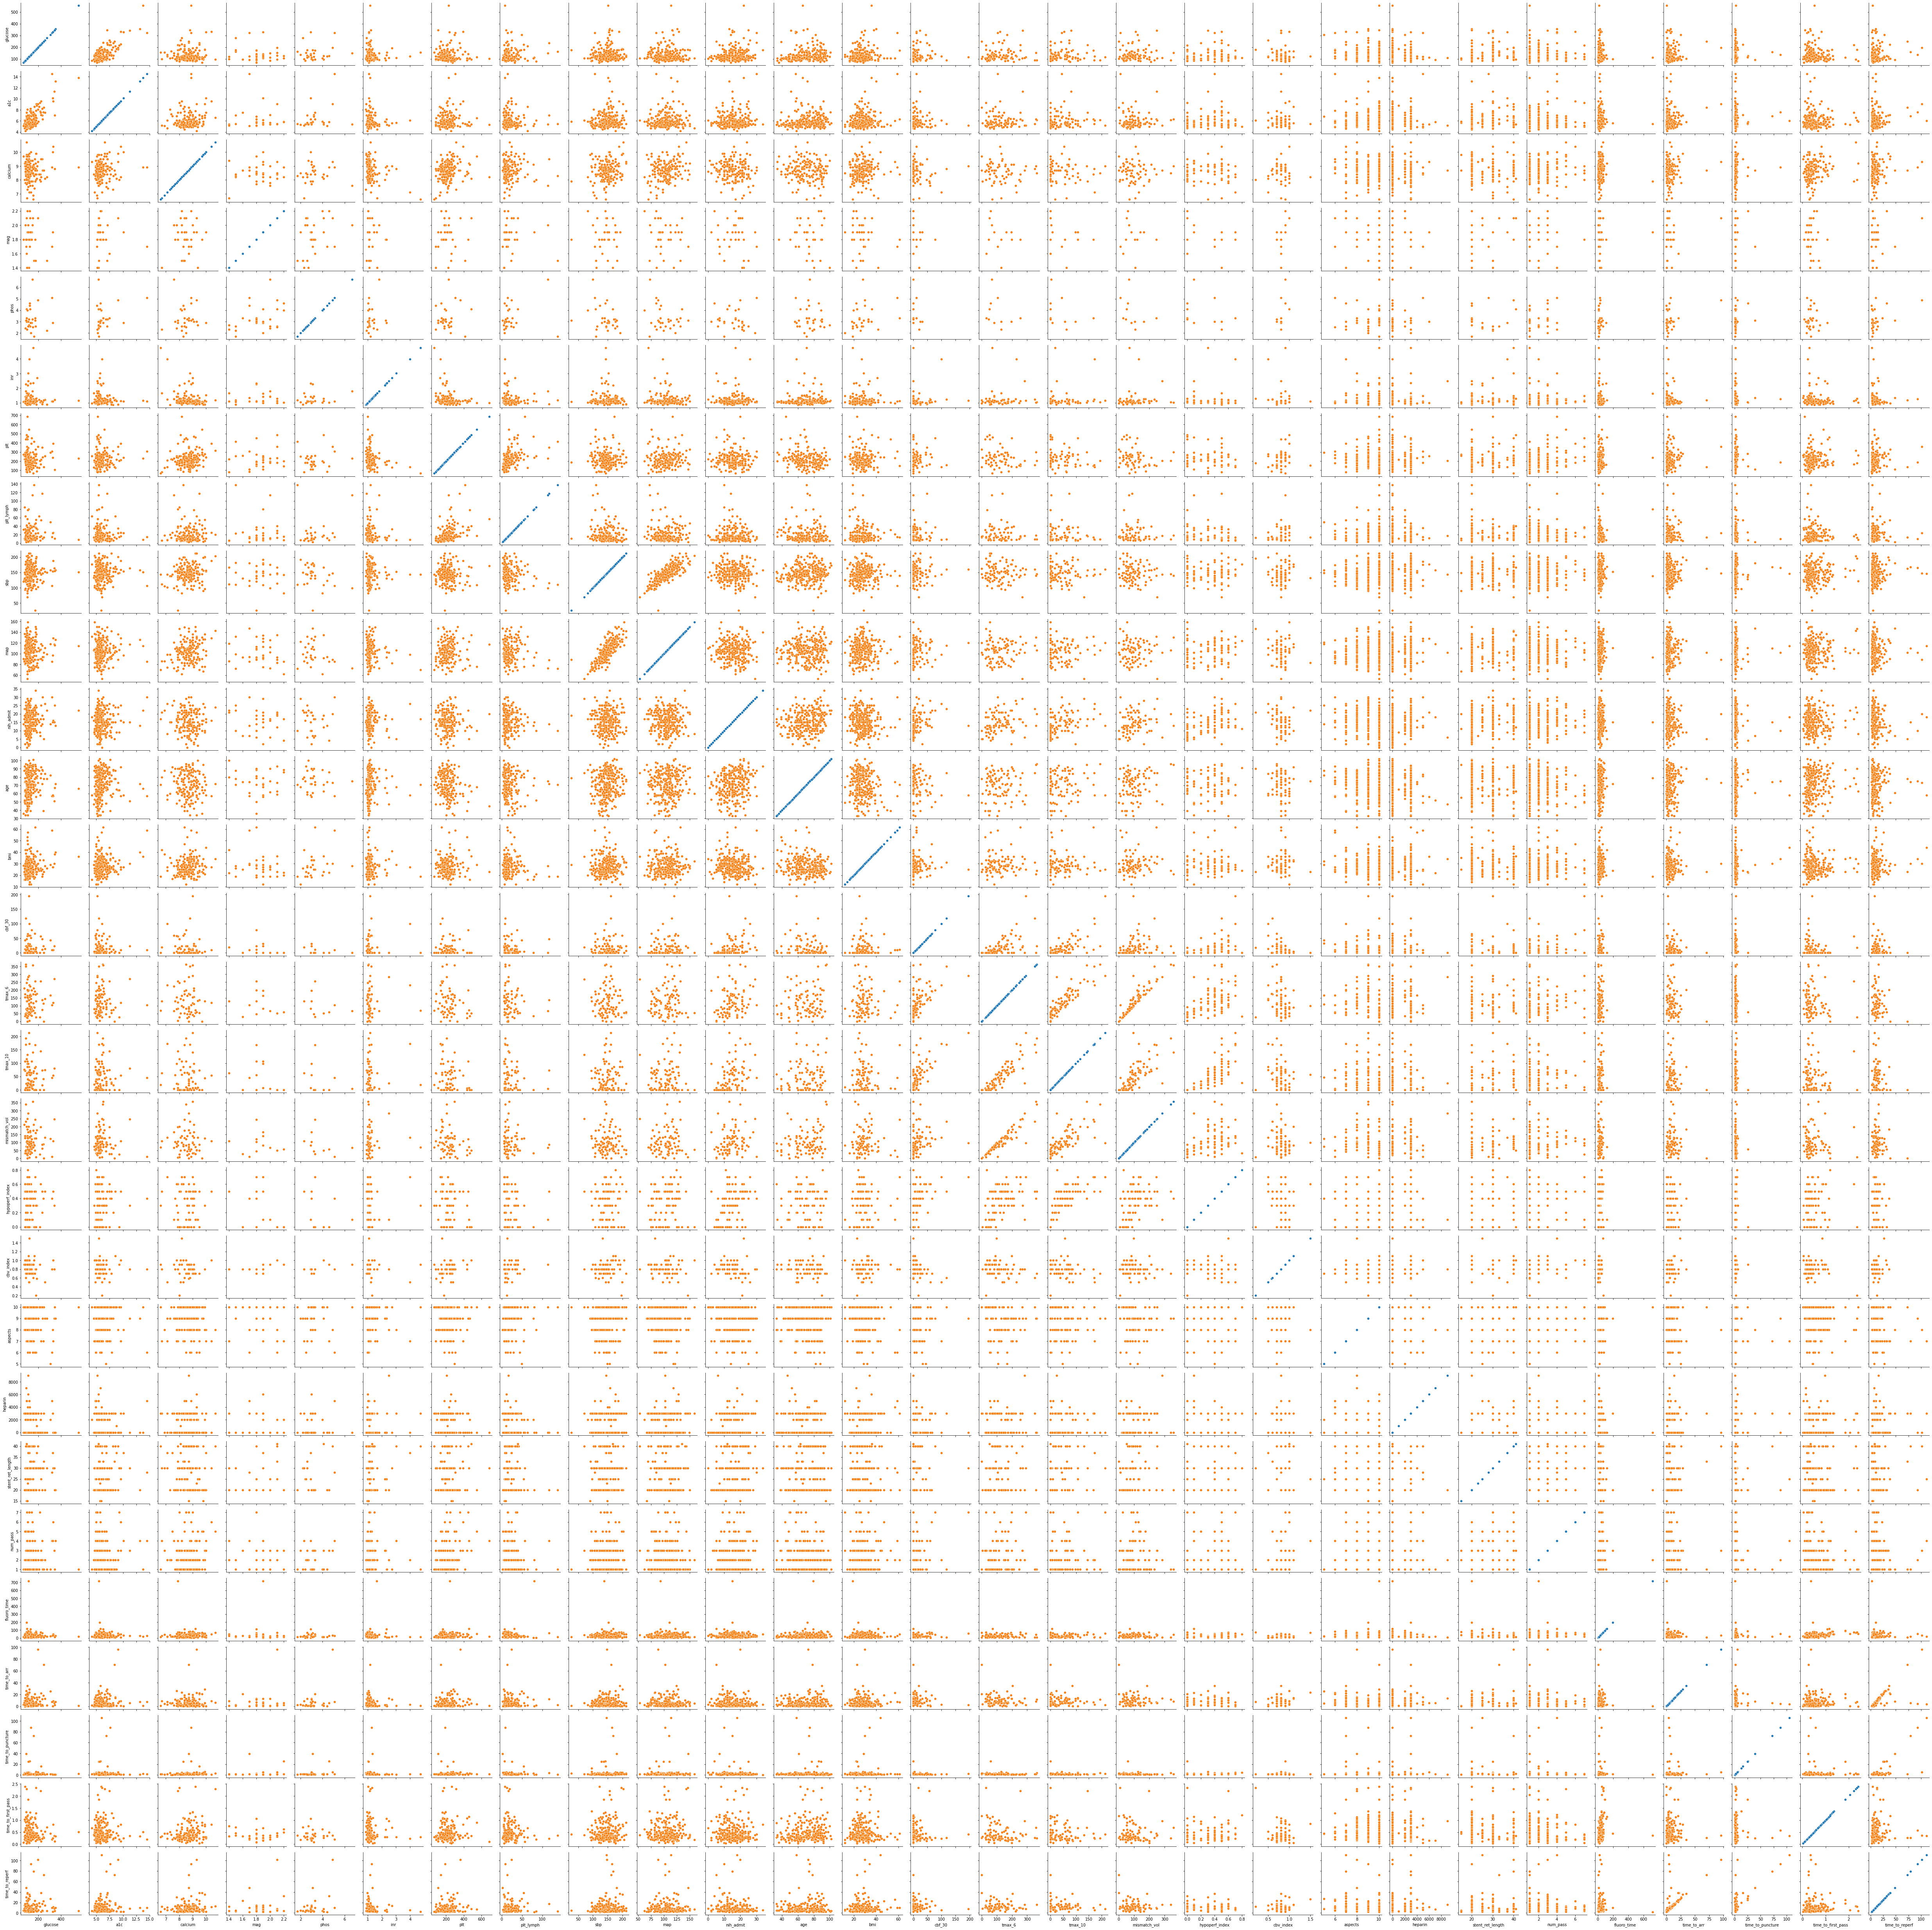

In [17]:
g = sns.PairGrid(X.select_dtypes(include = ['int64', 'float64']))
g.map(sns.scatterplot)
g.map_offdiag(sns.scatterplot)

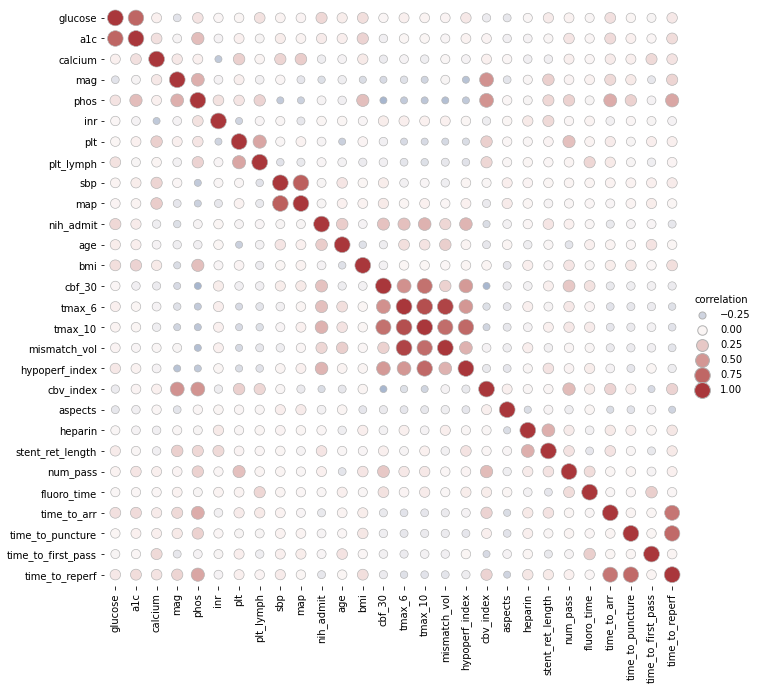

In [18]:
corr_mat = X.select_dtypes(include = ['int64', 'float64']).corr().stack().reset_index(name = 'correlation')

g = sns.relplot(
    data = corr_mat,
    x = 'level_0', y = 'level_1', hue = 'correlation', size = 'correlation',
    palette = 'vlag', hue_norm = (-1, 1), edgecolor = '.7',
    height = 10, sizes = (50, 250), size_norm = (-.2, .8),
)

g.set(xlabel = '', ylabel = '', aspect = 'equal')
g.despine(left = True, bottom = True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor('.7')

/var/folders/r2/d81lfs516v1305p_ns8bh_zh0000gn/T/ipykernel_75149/2591371887.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

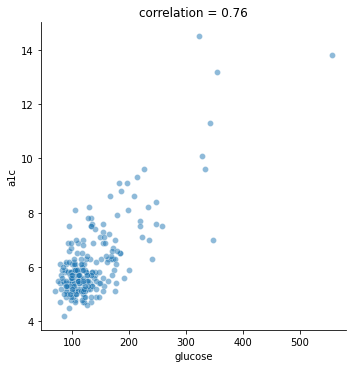

<Figure size 432x288 with 0 Axes>

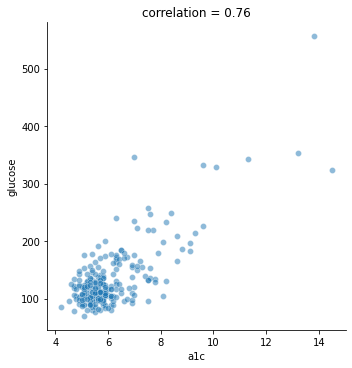

<Figure size 432x288 with 0 Axes>

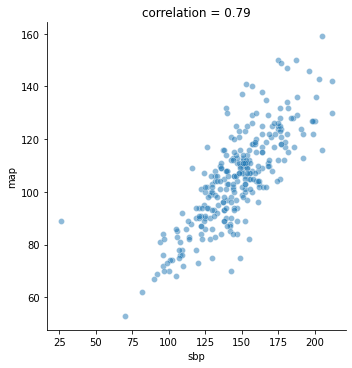

<Figure size 432x288 with 0 Axes>

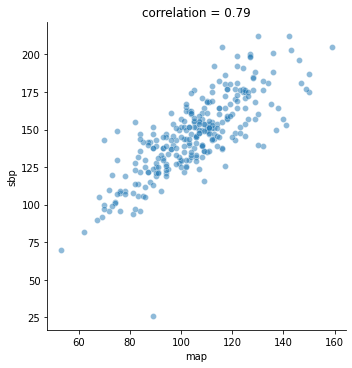

<Figure size 432x288 with 0 Axes>

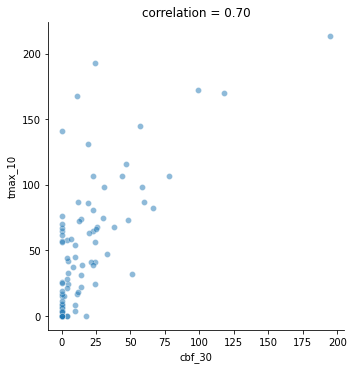

<Figure size 432x288 with 0 Axes>

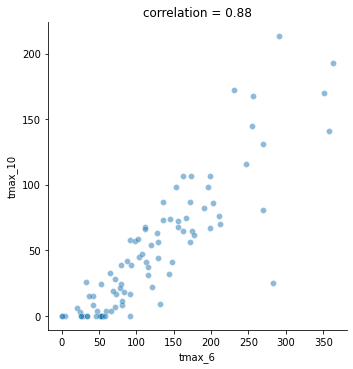

<Figure size 432x288 with 0 Axes>

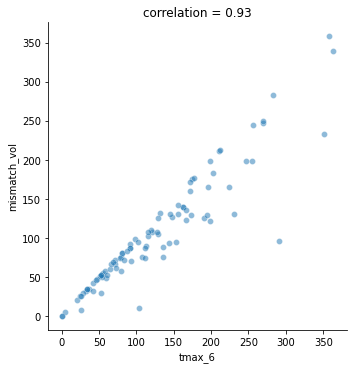

<Figure size 432x288 with 0 Axes>

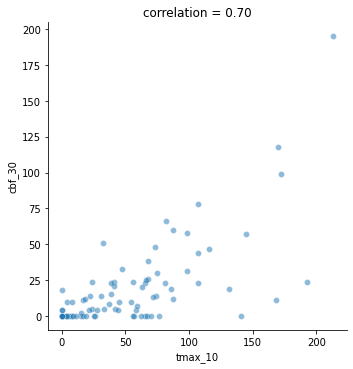

<Figure size 432x288 with 0 Axes>

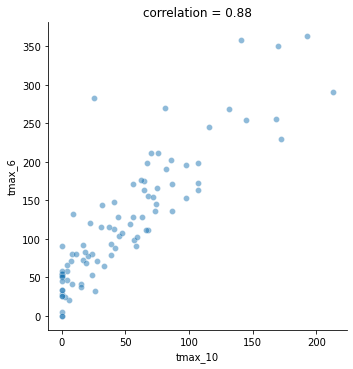

<Figure size 432x288 with 0 Axes>

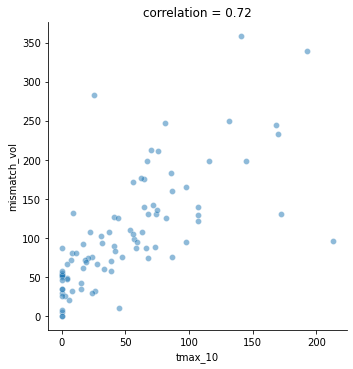

<Figure size 432x288 with 0 Axes>

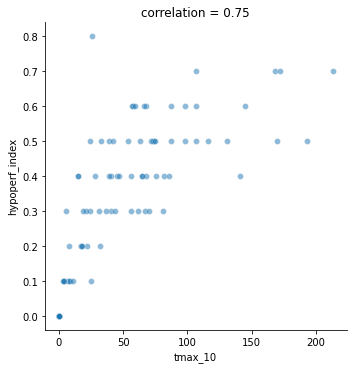

<Figure size 432x288 with 0 Axes>

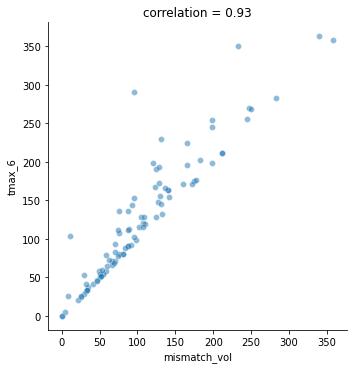

<Figure size 432x288 with 0 Axes>

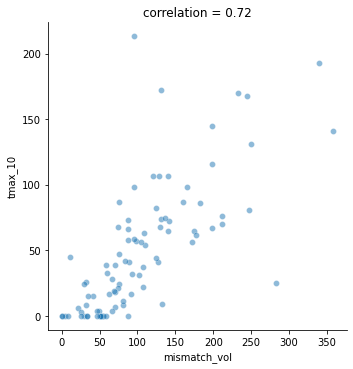

<Figure size 432x288 with 0 Axes>

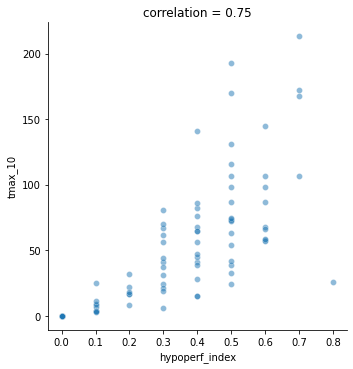

<Figure size 432x288 with 0 Axes>

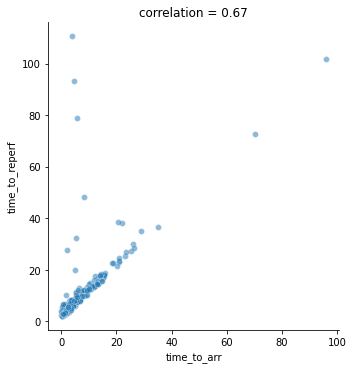

<Figure size 432x288 with 0 Axes>

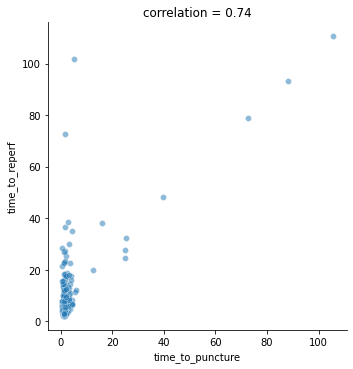

<Figure size 432x288 with 0 Axes>

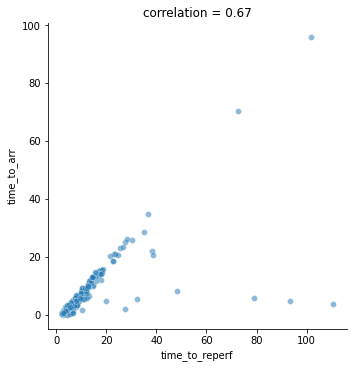

<Figure size 432x288 with 0 Axes>

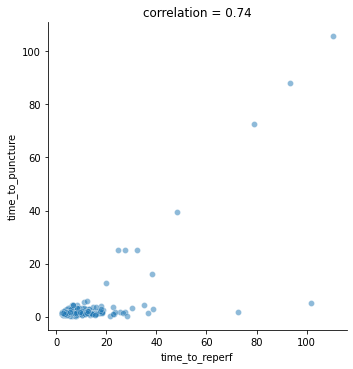

In [20]:
for rnum in range(corr_mat.shape[0]):
    if corr_mat.loc[rnum, 'correlation'] > 0.6 and not corr_mat.loc[rnum, 'correlation'] == 1:
        plt.figure()
        sns.relplot(x = corr_mat.loc[rnum, 'level_0'], y = corr_mat.loc[rnum, 'level_1'], data = X.select_dtypes(include = ['int64', 'float64']), 
                   alpha = 0.5).set(title = 'correlation = {0:.2f}'.format(corr_mat.loc[rnum, 'correlation']))

### Bivariate analysis with target

In [21]:
y.head()

fav_mrs
322        1
381        0
330        0
84         0
289        1

<AxesSubplot:xlabel='fav_mrs', ylabel='count'>

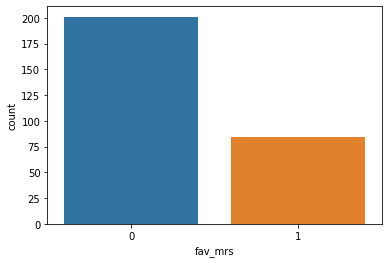

In [23]:
sns.countplot(data = y, x = 'fav_mrs')

/var/folders/r2/d81lfs516v1305p_ns8bh_zh0000gn/T/ipykernel_75149/934126515.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


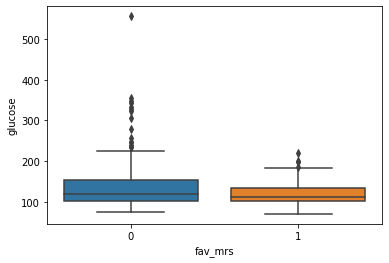

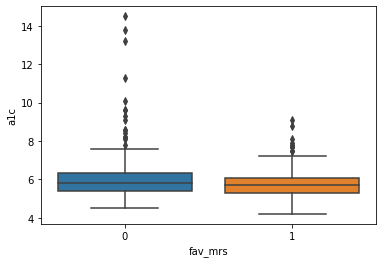

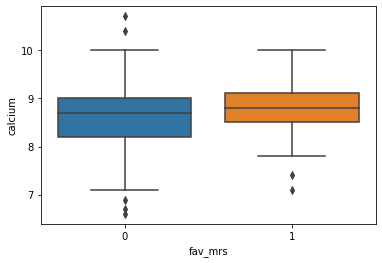

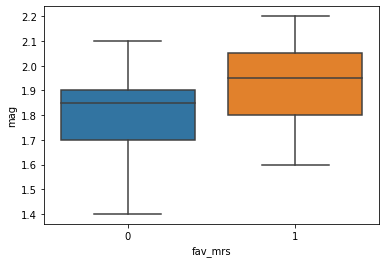

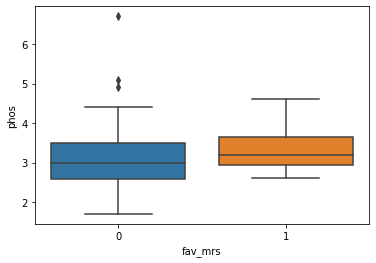

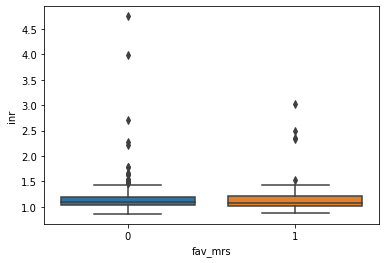

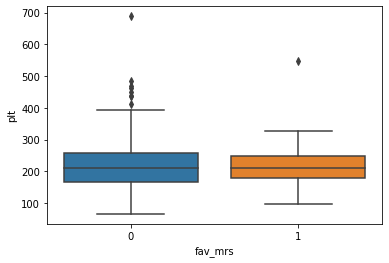

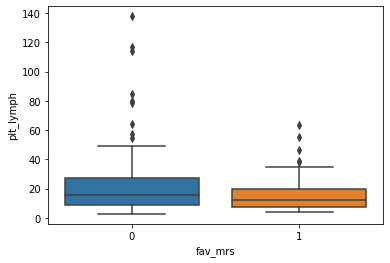

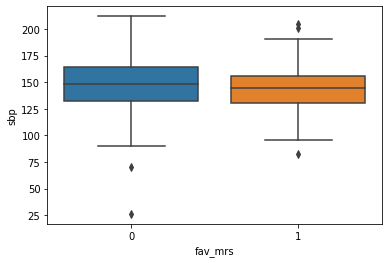

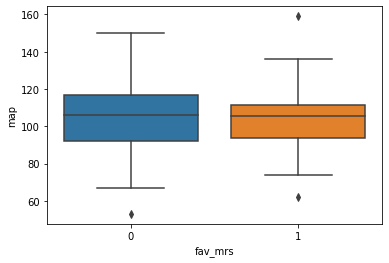

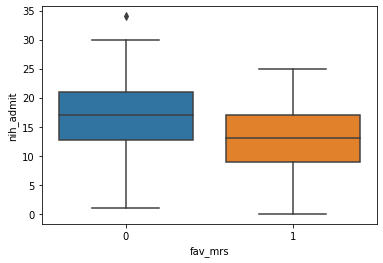

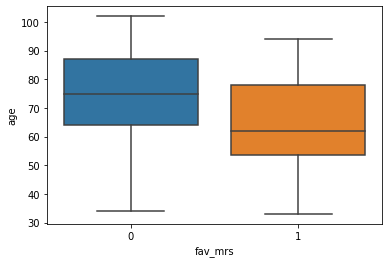

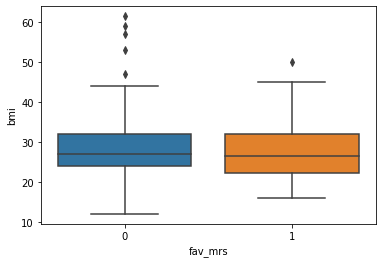

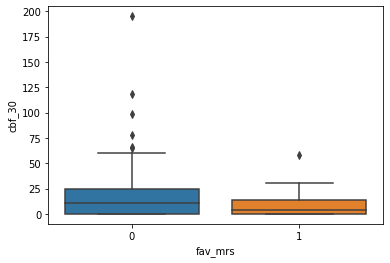

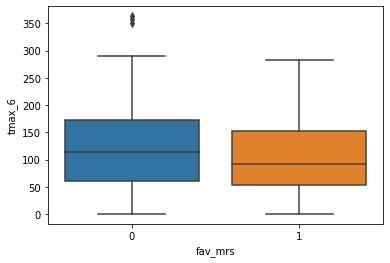

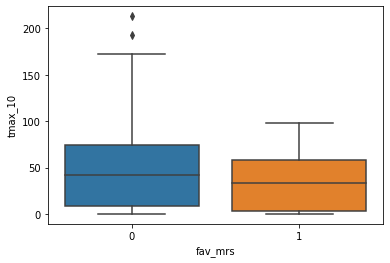

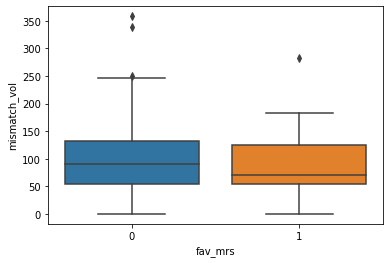

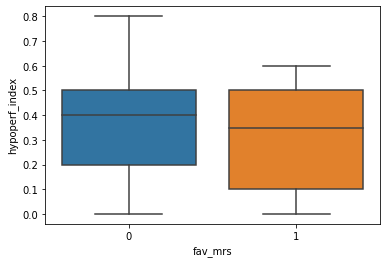

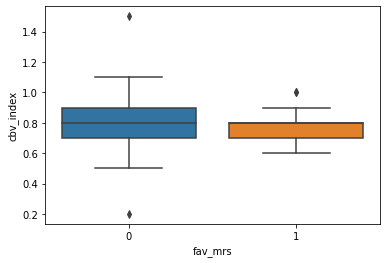

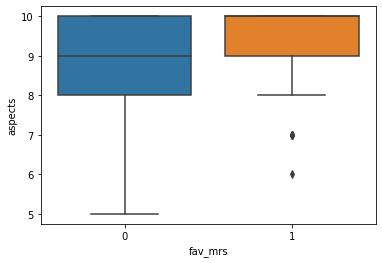

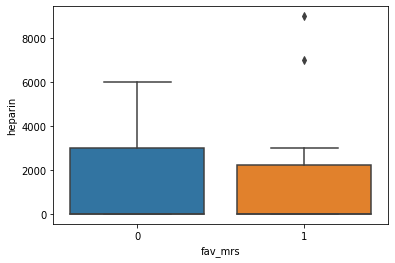

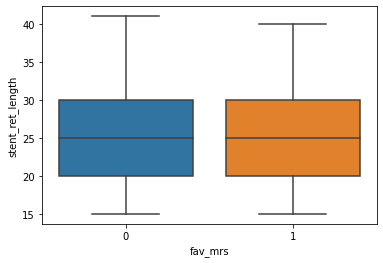

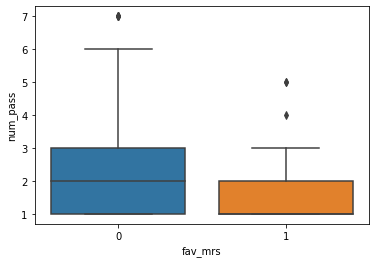

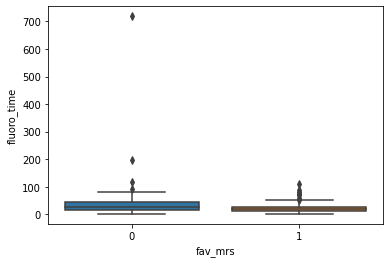

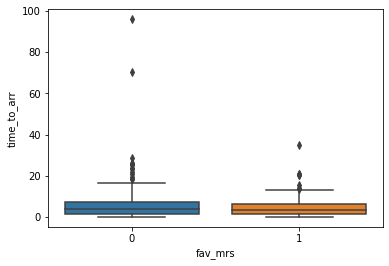

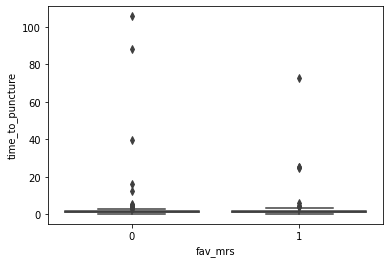

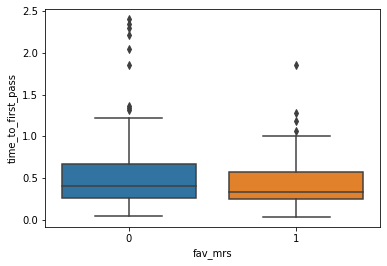

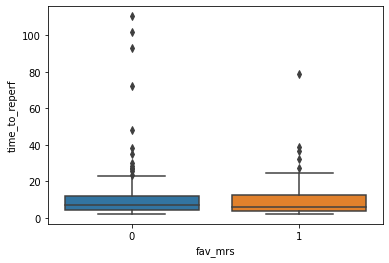

In [25]:
for col in X.select_dtypes(include = ['int64', 'float64']):
    plt.figure()
    sns.boxplot(x = y['fav_mrs'], y = X[col])

In [28]:
def make_heatmap(feature, target = 'fav_mrs'):
    Xy = pd.concat([X[feature], y[target]], axis = 1)
    Xy2 = pd.crosstab(Xy[feature], Xy[target])
    sns.heatmap(Xy2, annot = True)

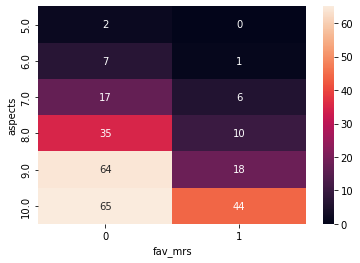

In [29]:
make_heatmap(feature = 'aspects')

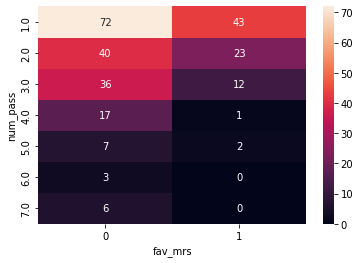

In [30]:
make_heatmap(feature = 'num_pass')

In [32]:
pd.concat([X['aspects'], y['fav_mrs']], axis = 1)

aspects  fav_mrs
322     10.0        1
381     10.0        0
330      7.0        0
84      10.0        0
289      8.0        1
402     10.0        0
18       9.0        0
74       9.0        0
149      7.0        0
8        9.0        0
340     10.0        1
171      8.0        0
361     10.0        0
357      9.0        0
247      9.0        0
177     10.0        1
122      8.0        1
306      8.0        0
68      10.0        0
130     10.0        0
292      9.0        1
124     10.0        0
323     10.0        1
257     10.0        0
19       7.0        0
163      6.0        0
27       8.0        0
114      9.0        0
382      8.0        0
204      9.0        0
356      7.0        0
154     10.0        0
174     10.0        1
253     10.0        1
403      7.0        0
230     10.0        0
194      9.0        1
352      8.0        1
185      9.0        0
386      9.0        0
21       9.0        0
324      7.0        0
88       8.0        1
337     10.0        0
20       9.0        0
239      8.0        1
117     10.0        0
384      6.0        0
134      7.0        0
34       NaN        0
41       6.0        1
172      9.0        1
197      9.0        0
300      8.0        0
283      9.0        0
187      5.0        0
188      8.0        0
67      10.0        0
126     10.0        0
390     10.0        1
7        9.0        1
341      NaN        0
271     10.0        0
12      10.0        1
183      9.0        0
116     10.0        1
90       8.0        0
196     10.0        0
229      9.0        0
198      9.0        0
202      6.0        0
272      9.0        1
220      9.0        0
103      9.0        1
77      10.0        1
270     10.0        0
109     10.0        1
161      9.0        0
311      9.0        0
110      9.0        0
221     10.0        0
76       9.0        1
26       9.0        0
42      10.0        1
162     10.0        1
139      5.0        0
75      10.0        0
325     10.0        0
360      9.0        0
142      NaN        0
164     10.0        0
226      7.0        0
95       9.0        0
343     10.0        0
380     10.0        0
344      8.0        0
255      9.0        0
310      NaN        1
193      9.0        1
287      9.0        0
201      9.0        0
284     10.0        0
146      8.0        0
43       9.0        0
13       9.0        0
262     10.0        0
223      8.0        0
128      9.0        0
200      9.0        0
264      NaN        1
258      9.0        0
133      9.0        0
377     10.0        1
393      8.0        0
294      9.0        0
371     10.0        0
184      8.0        1
388      9.0        1
275      7.0        0
173      8.0        0
277     10.0        0
2       10.0        0
131      8.0        0
225      8.0        0
355     10.0        0
369     10.0        1
136      8.0        0
315     10.0        0
326      9.0        0
389      9.0        0
144      9.0        0
83      10.0        1
331     10.0        0
32      10.0        1
92       8.0        0
338      9.0        0
120      9.0        0
237      8.0        0
281     10.0        1
150      9.0        0
205     10.0        0
299      8.0        0
49       8.0        0
376      7.0        1
73      10.0        1
305      7.0        1
94       9.0        0
208     10.0        1
78      10.0        0
178      8.0        1
14      10.0        0
40      10.0        1
31      10.0        1
190      9.0        1
159      9.0        0
169      7.0        0
250     10.0        1
148     10.0        0
265      9.0        0
59       7.0        0
307      NaN        0
107      9.0        0
359      7.0        1
199      8.0        0
231      8.0        0
140      9.0        1
46      10.0        1
100      9.0        1
318      NaN        0
233     10.0        1
153     10.0        0
29       8.0        1
400     10.0        0
158     10.0        0
280     10.0        0
339     10.0        0
4        NaN        1
0       10.0        0
368     10.0        1
348      7.0        1
372      NaN        0
1

In [33]:
def plot_bar_percent(x, y, data):
    plt.figure()
    g = data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((
        sns.catplot, 'data'), x = x, y = 'percent', hue = y, kind = 'bar')
    g.ax.set_ylim(0, 100)
    
    # insert percentages above bars 
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

/var/folders/r2/d81lfs516v1305p_ns8bh_zh0000gn/T/ipykernel_75149/3922163328.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

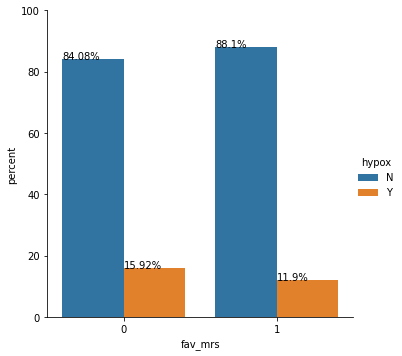

<Figure size 432x288 with 0 Axes>

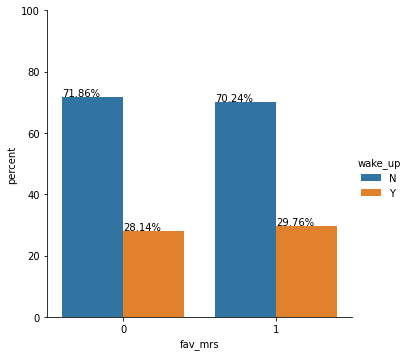

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


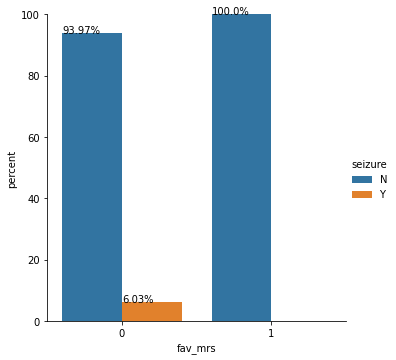

<Figure size 432x288 with 0 Axes>

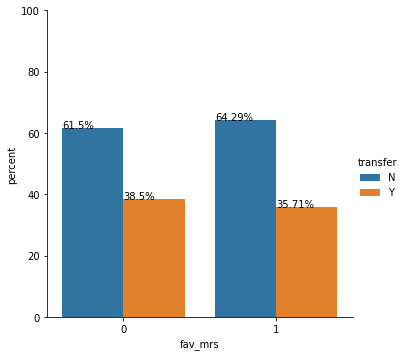

<Figure size 432x288 with 0 Axes>

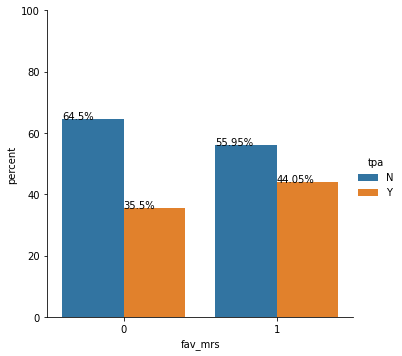

<Figure size 432x288 with 0 Axes>

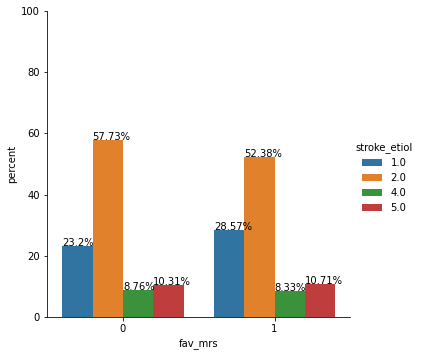

<Figure size 432x288 with 0 Axes>

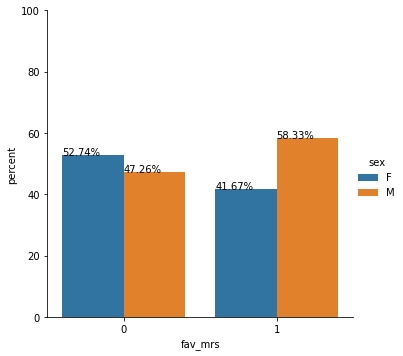

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


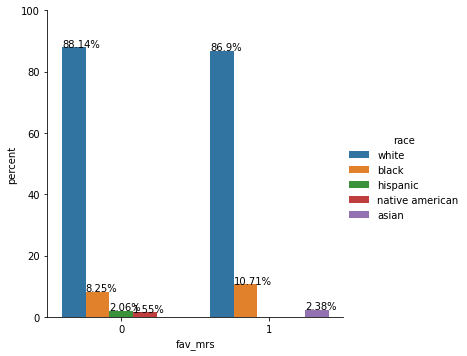

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


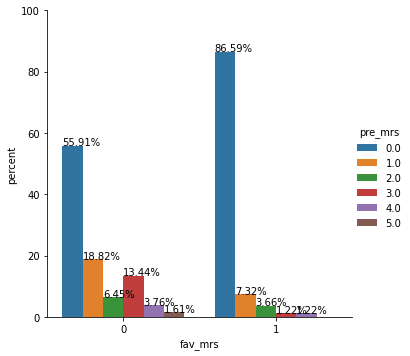

<Figure size 432x288 with 0 Axes>

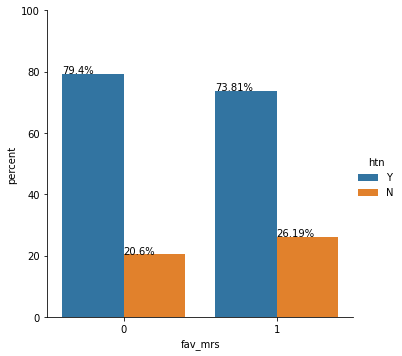

<Figure size 432x288 with 0 Axes>

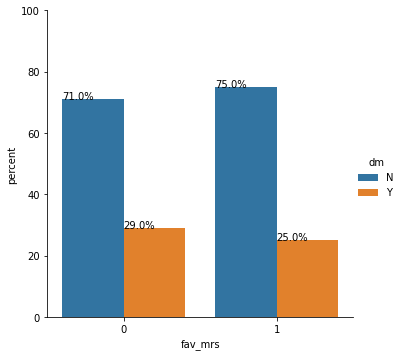

<Figure size 432x288 with 0 Axes>

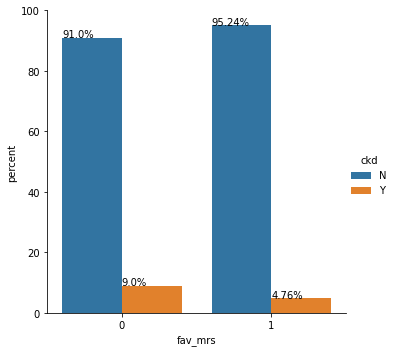

<Figure size 432x288 with 0 Axes>

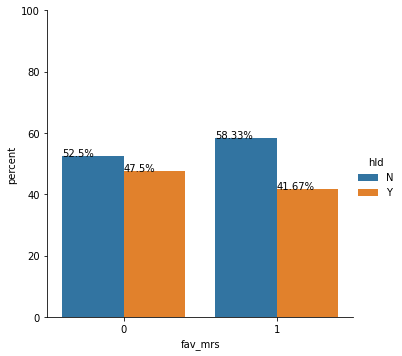

<Figure size 432x288 with 0 Axes>

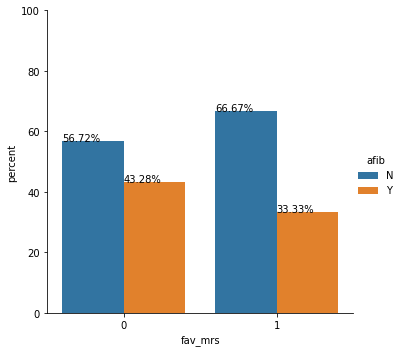

<Figure size 432x288 with 0 Axes>

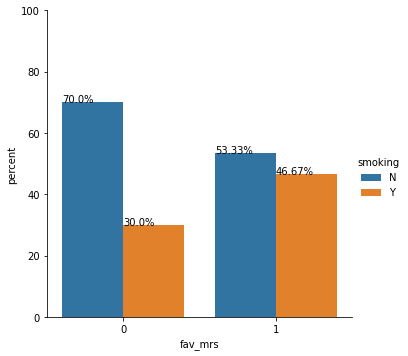

<Figure size 432x288 with 0 Axes>

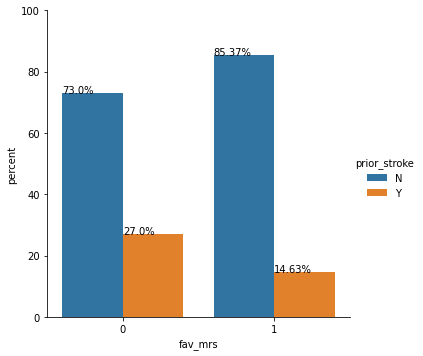

<Figure size 432x288 with 0 Axes>

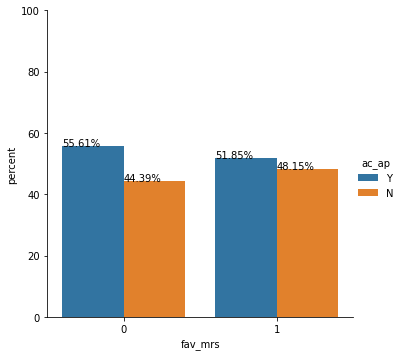

<Figure size 432x288 with 0 Axes>

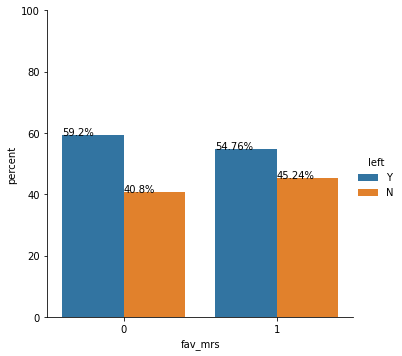

<Figure size 432x288 with 0 Axes>

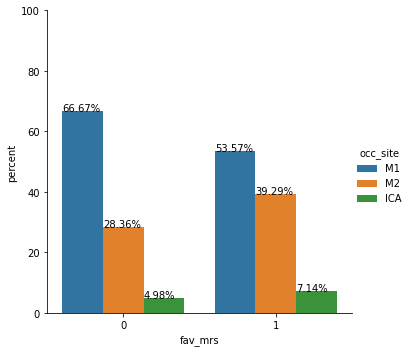

<Figure size 432x288 with 0 Axes>

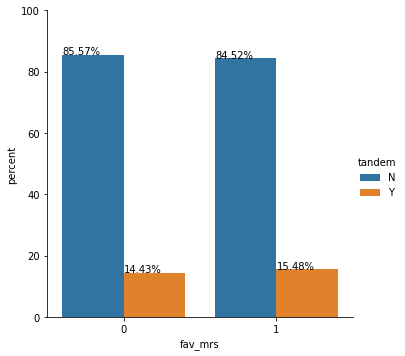

<Figure size 432x288 with 0 Axes>

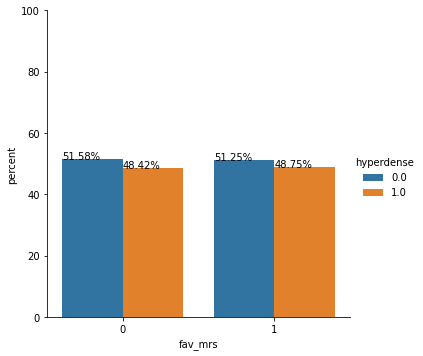

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


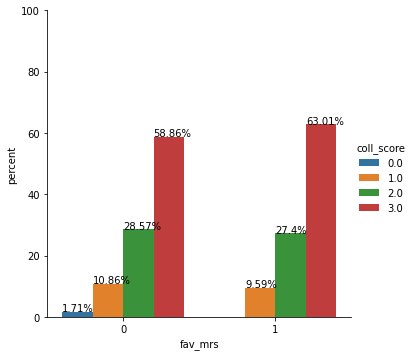

<Figure size 432x288 with 0 Axes>

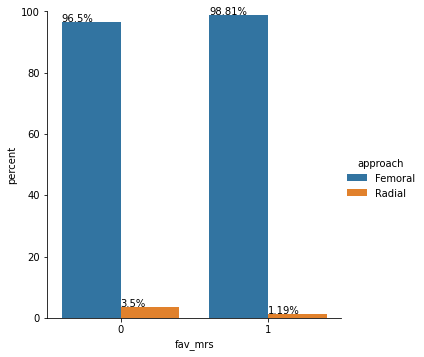

<Figure size 432x288 with 0 Axes>

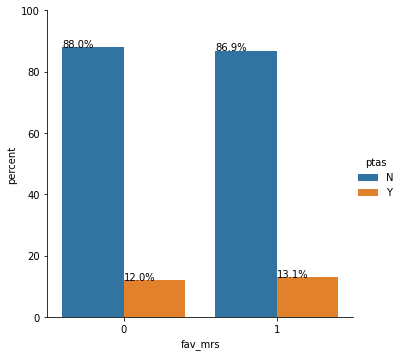

<Figure size 432x288 with 0 Axes>

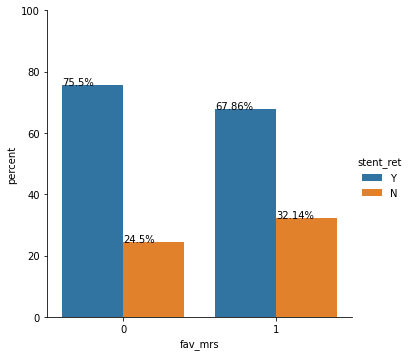

<Figure size 432x288 with 0 Axes>

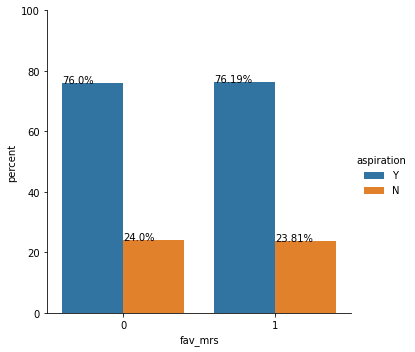

<Figure size 432x288 with 0 Axes>

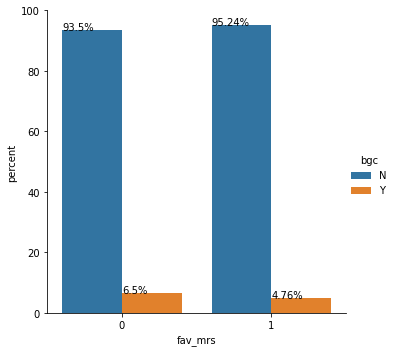

<Figure size 432x288 with 0 Axes>

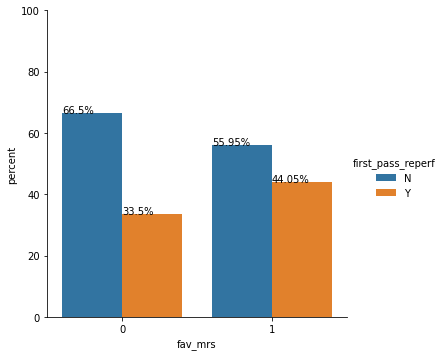

<Figure size 432x288 with 0 Axes>

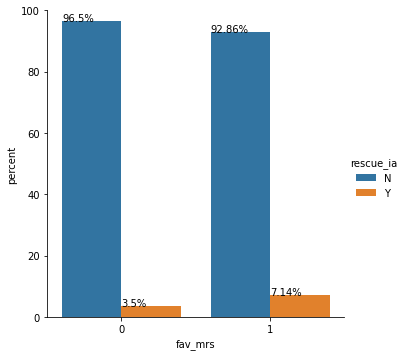

<Figure size 432x288 with 0 Axes>

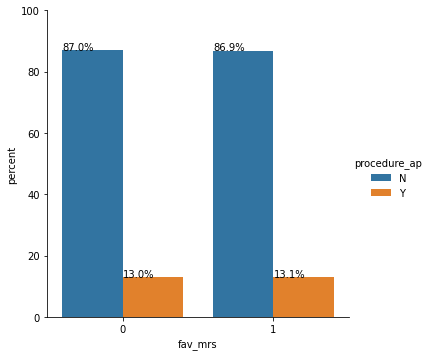

<Figure size 432x288 with 0 Axes>

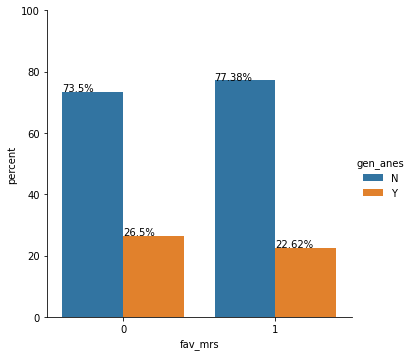

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


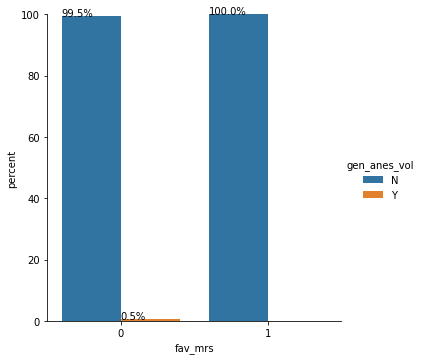

<Figure size 432x288 with 0 Axes>

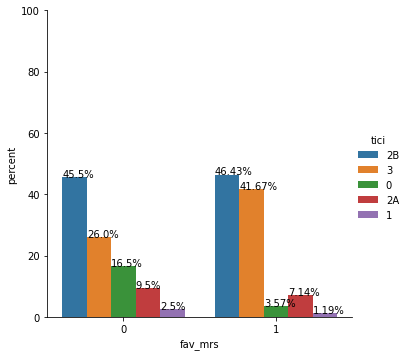

<Figure size 432x288 with 0 Axes>

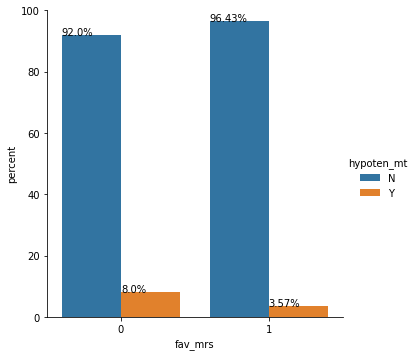

<Figure size 432x288 with 0 Axes>

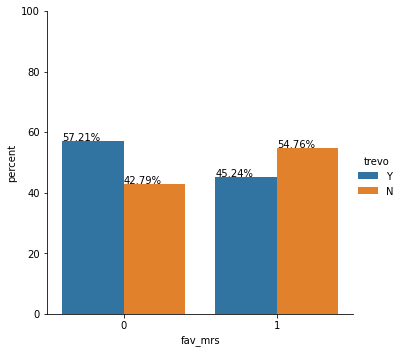

<Figure size 432x288 with 0 Axes>

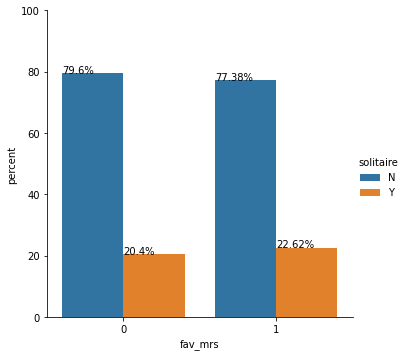

<Figure size 432x288 with 0 Axes>

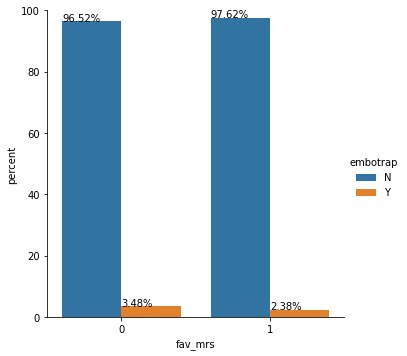

<Figure size 432x288 with 0 Axes>

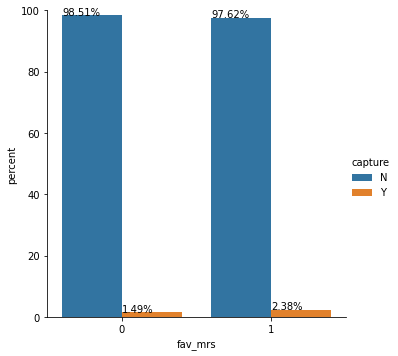

In [34]:
for col in X.select_dtypes(include = 'object'):
    plot_bar_percent(x = 'fav_mrs', y = col, data = Xy)

<Figure size 432x288 with 0 Axes>

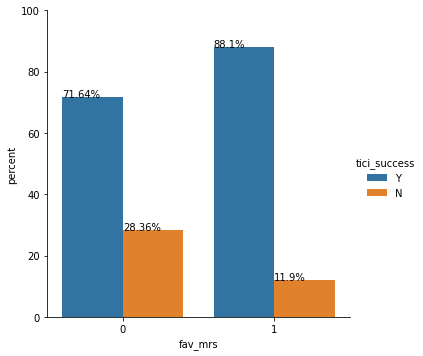

In [35]:
# dichotomize TICI

Xy['tici_success'] = np.where(Xy['tici'].str.contains('3|2B', regex = True), 'Y', 'N')
plot_bar_percent(x = 'fav_mrs', y = 'tici_success', data = Xy)

<Figure size 432x288 with 0 Axes>

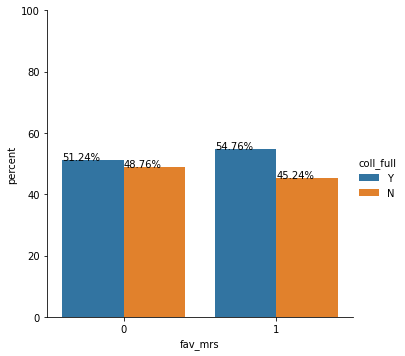

In [37]:
# dichotomize collateral score

Xy['coll_full'] = np.where(Xy['coll_score'] == 3.0, 'Y', 'N')
plot_bar_percent(x = 'fav_mrs', y = 'coll_full', data = Xy)

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


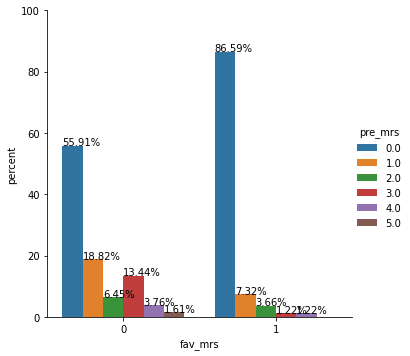

In [38]:
# dichotomize pre-morbid mRS
# mRS = 0 compared to 1-5

Xy['pre_mrs_0'] = np.where(Xy['pre_mrs'] == 0.0, 'Y', 'N')
plot_bar_percent(x = 'fav_mrs', y = 'pre_mrs', data = Xy)

<Figure size 432x288 with 0 Axes>

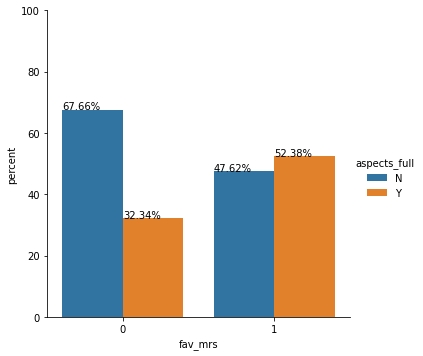

In [39]:
# dichotomize aspects

Xy['aspects_full'] = np.where(Xy['aspects'] == 10, 'Y', 'N')
plot_bar_percent(x = 'fav_mrs', y = 'aspects_full', data = Xy)